In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [57]:
df = pd.read_csv('bank_transactions.csv')
df.shape

(1048567, 9)

In [37]:
df.head()

TransactionID CustomerID CustomerDOB CustGender CustLocation  \
0            T1   C5841053     10/1/94          F   JAMSHEDPUR   
1            T2   C2142763      4/4/57          M      JHAJJAR   
2            T3   C4417068    26/11/96          F       MUMBAI   
3            T4   C5342380     14/9/73          F       MUMBAI   
4            T5   C9031234     24/3/88          F  NAVI MUMBAI   

   CustAccountBalance TransactionDate  TransactionTime  \
0            17819.05          2/8/16           143207   
1             2270.69          2/8/16           141858   
2            17874.44          2/8/16           142712   
3           866503.21          2/8/16           142714   
4             6714.43          2/8/16           181156   

   TransactionAmount (INR)  
0                     25.0  
1                  27999.0  
2                    459.0  
3                   2060.0  
4                   1762.5

In [38]:
df.columns

Index(['TransactionID', 'CustomerID', 'CustomerDOB', 'CustGender',
       'CustLocation', 'CustAccountBalance', 'TransactionDate',
       'TransactionTime', 'TransactionAmount (INR)'],
      dtype='object')

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048567 entries, 0 to 1048566
Data columns (total 9 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   TransactionID            1048567 non-null  object 
 1   CustomerID               1048567 non-null  object 
 2   CustomerDOB              1045170 non-null  object 
 3   CustGender               1047467 non-null  object 
 4   CustLocation             1048416 non-null  object 
 5   CustAccountBalance       1046198 non-null  float64
 6   TransactionDate          1048567 non-null  object 
 7   TransactionTime          1048567 non-null  int64  
 8   TransactionAmount (INR)  1048567 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 72.0+ MB


In [40]:
# let's check unique values
columns=df.columns
for col in columns:
    print(col,':\n',df[col].unique())
    print(df[col].value_counts())
    print('\n',20*'**','\n')

TransactionID :
 ['T1' 'T2' 'T3' ... 'T1048565' 'T1048566' 'T1048567']
T1          1
T699051     1
T699038     1
T699039     1
T699040     1
           ..
T349528     1
T349529     1
T349530     1
T349531     1
T1048567    1
Name: TransactionID, Length: 1048567, dtype: int64

 **************************************** 

CustomerID :
 ['C5841053' 'C2142763' 'C4417068' ... 'C8020229' 'C6459278' 'C6420483']
C5533885    6
C6624352    6
C1736254    6
C6735477    6
C1113684    6
           ..
C8716232    1
C4474828    1
C3341662    1
C6821983    1
C6420483    1
Name: CustomerID, Length: 884265, dtype: int64

 **************************************** 

CustomerDOB :
 ['10/1/94' '4/4/57' '26/11/96' ... '18/7/65' '15/5/42' '24/10/44']
1/1/1800    57339
1/1/89        809
1/1/90        784
6/8/91        699
1/1/91        666
            ...  
3/9/60          1
17/11/52        1
11/9/63         1
28/2/47         1
24/10/44        1
Name: CustomerDOB, Length: 17254, dtype: int64

 ******************

In [41]:
df.describe()

CustAccountBalance  TransactionTime  TransactionAmount (INR)
count        1.046198e+06     1.048567e+06             1.048567e+06
mean         1.154035e+05     1.570875e+05             1.574335e+03
std          8.464854e+05     5.126185e+04             6.574743e+03
min          0.000000e+00     0.000000e+00             0.000000e+00
25%          4.721760e+03     1.240300e+05             1.610000e+02
50%          1.679218e+04     1.642260e+05             4.590300e+02
75%          5.765736e+04     2.000100e+05             1.200000e+03
max          1.150355e+08     2.359590e+05             1.560035e+06

In [42]:
df.dtypes

TransactionID               object
CustomerID                  object
CustomerDOB                 object
CustGender                  object
CustLocation                object
CustAccountBalance         float64
TransactionDate             object
TransactionTime              int64
TransactionAmount (INR)    float64
dtype: object

array([[<AxesSubplot:title={'center':'CustAccountBalance'}>,
        <AxesSubplot:title={'center':'TransactionTime'}>],
       [<AxesSubplot:title={'center':'TransactionAmount (INR)'}>,
        <AxesSubplot:>]], dtype=object)

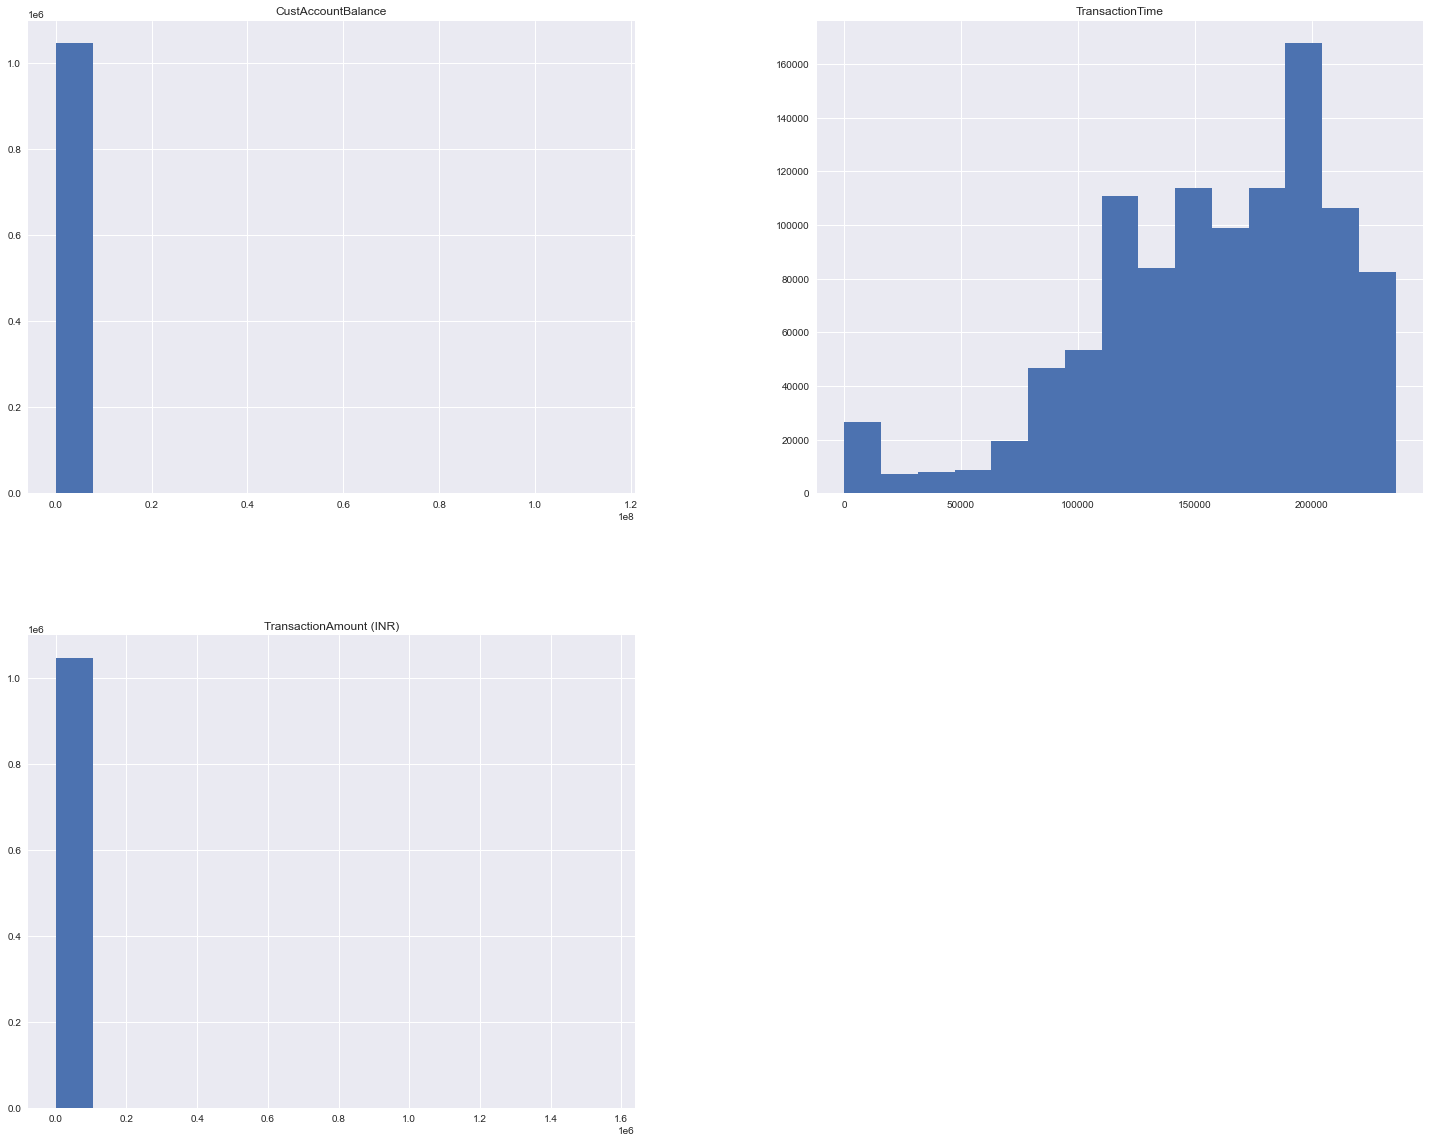

In [43]:
plt.style.use("seaborn")
df.hist(figsize=(25,20), bins=15)

In [58]:
df.isna().sum()

TransactionID                 0
CustomerID                    0
CustomerDOB                3397
CustGender                 1100
CustLocation                151
CustAccountBalance         2369
TransactionDate               0
TransactionTime               0
TransactionAmount (INR)       0
dtype: int64

In [59]:
# drop missing data
df.dropna(inplace=True)

In [60]:
df.isna().sum()

TransactionID              0
CustomerID                 0
CustomerDOB                0
CustGender                 0
CustLocation               0
CustAccountBalance         0
TransactionDate            0
TransactionTime            0
TransactionAmount (INR)    0
dtype: int64

In [47]:
df['CustGender'].unique()

array(['F', 'M', 'T'], dtype=object)

In [48]:
df.drop(df[df['CustGender']=='T'].index,inplace=True)

In [49]:
df['CustGender'].value_counts()

M    760978
F    280635
Name: CustGender, dtype: int64

<AxesSubplot:xlabel='CustGender', ylabel='count'>

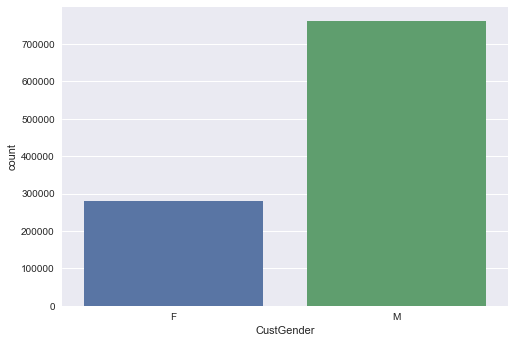

In [50]:
sns.countplot(x="CustGender", data=df)

<AxesSubplot:ylabel='CustGender'>

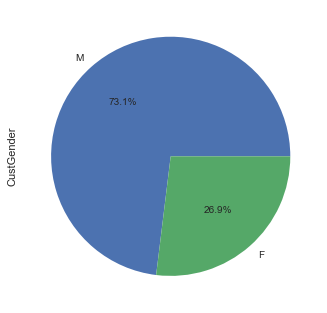

In [51]:
df['CustGender'].value_counts().plot(kind='pie',autopct='%1.1f%%')

Text(0.5, 1.0, 'Top 20 Locations of Customer ')

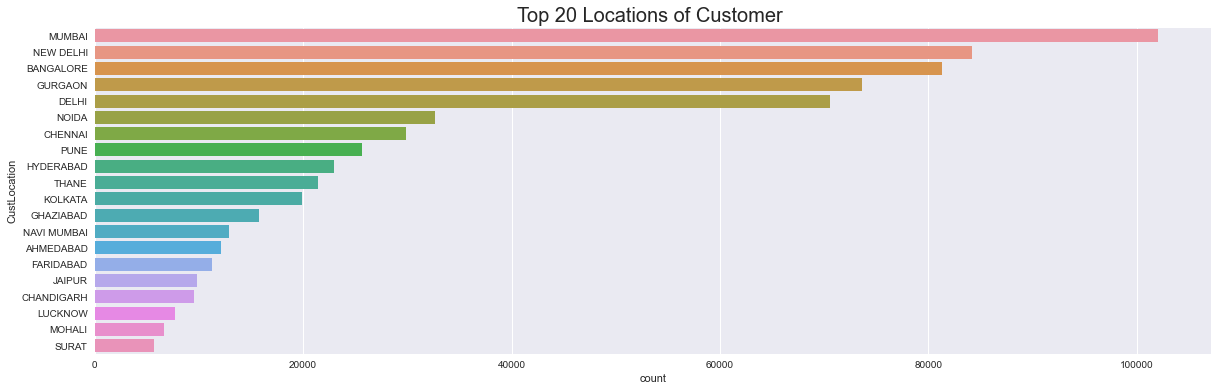

In [52]:
plt.figure(figsize=(20,6))
sns.countplot(y='CustLocation',data=df,
              order = df['CustLocation'].value_counts()[:20].index)
plt.title("Top 20 Locations of Customer ",fontsize='20')

In [54]:
df['CustomerAge'] = df['TransactionDate'].dt.year - df['CustomerDOB'].dt.year

In [55]:
df.head()

TransactionID CustomerID CustomerDOB CustGender CustLocation  \
0            T1   C5841053  1994-10-01          F   JAMSHEDPUR   
1            T2   C2142763  2057-04-04          M      JHAJJAR   
2            T3   C4417068  1996-11-26          F       MUMBAI   
3            T4   C5342380  1973-09-14          F       MUMBAI   
4            T5   C9031234  1988-03-24          F  NAVI MUMBAI   

   CustAccountBalance TransactionDate  TransactionTime  \
0            17819.05      2016-02-08           143207   
1             2270.69      2016-02-08           141858   
2            17874.44      2016-02-08           142712   
3           866503.21      2016-02-08           142714   
4             6714.43      2016-02-08           181156   

   TransactionAmount (INR)  CustomerAge  
0                     25.0           22  
1                  27999.0          -41  
2                    459.0           20  
3                   2060.0           43  
4                   1762.5           28

In [63]:
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])

In [64]:
df['TransactionDay'] = df['TransactionDate'].dt.day
df['TransactionMonth'] = df['TransactionDate'].dt.month
df['TransactionYear'] = df['TransactionDate'].dt.year

In [65]:
df.head()

TransactionID CustomerID CustomerDOB CustGender CustLocation  \
0            T1   C5841053     10/1/94          F   JAMSHEDPUR   
1            T2   C2142763      4/4/57          M      JHAJJAR   
2            T3   C4417068    26/11/96          F       MUMBAI   
3            T4   C5342380     14/9/73          F       MUMBAI   
4            T5   C9031234     24/3/88          F  NAVI MUMBAI   

   CustAccountBalance TransactionDate  TransactionTime  \
0            17819.05      2016-02-08           143207   
1             2270.69      2016-02-08           141858   
2            17874.44      2016-02-08           142712   
3           866503.21      2016-02-08           142714   
4             6714.43      2016-02-08           181156   

   TransactionAmount (INR)  TransactionDay  TransactionMonth  TransactionYear  
0                     25.0               8                 2             2016  
1                  27999.0               8                 2             2016  
2                    459.0               8                 2             2016  
3                   2060.0               8                 2             2016  
4                   1762.5               8                 2             2016

In [66]:
df['TransactionDay'].unique()

array([ 8, 21, 16, 14, 17, 19, 24, 22, 29, 31, 23, 13, 25, 28, 15, 27, 20,
       30, 26, 18,  9], dtype=int64)

In [67]:
df['TransactionDay'].value_counts()

9     273920
8     264458
13     47244
14     45252
15     43630
18     33960
26     29991
27     28750
25     26551
21     26474
22     25366
20     21188
17     20960
28     20944
23     20699
16     20281
31     19586
30     19208
19     18559
24     17893
29     16700
Name: TransactionDay, dtype: int64

<AxesSubplot:xlabel='TransactionDay', ylabel='count'>

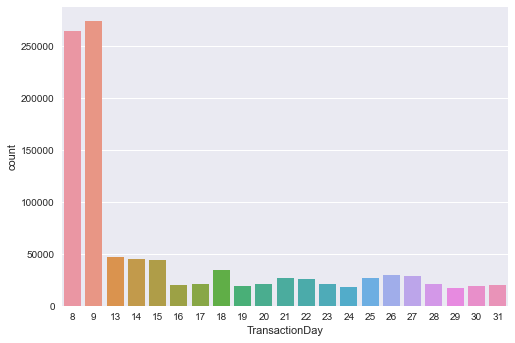

In [68]:
sns.countplot(x="TransactionDay", data=df)

<AxesSubplot:ylabel='TransactionDay'>

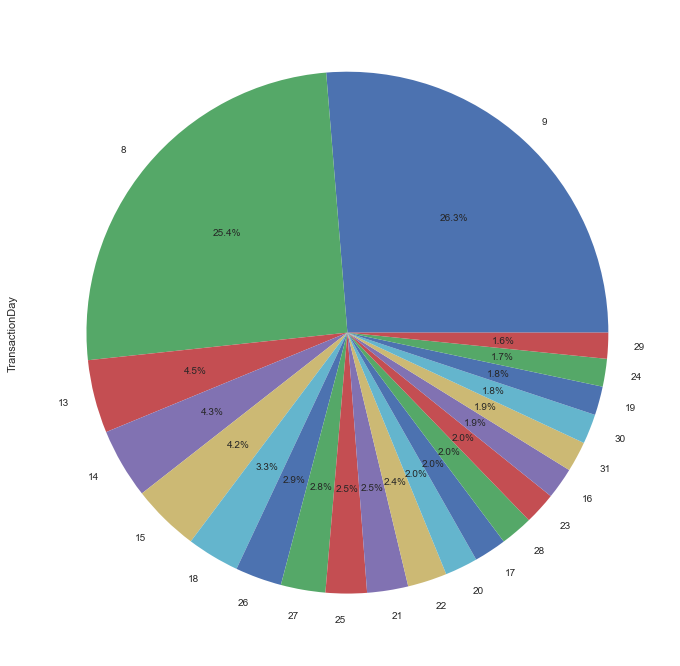

In [73]:
plt.figure(figsize = (12,12))
df['TransactionDay'].value_counts().plot(kind='pie',autopct='%1.1f%%')

In [74]:
df['TransactionMonth'].unique()

array([ 2,  1,  3,  5,  4,  6,  9,  8, 12,  7, 10, 11], dtype=int64)

In [75]:
df['TransactionMonth'].value_counts()

8     427316
9     157924
10     50729
7      48083
11     47029
4      46955
3      46738
6      45926
2      43505
12     42888
1      42456
5      42065
Name: TransactionMonth, dtype: int64

<AxesSubplot:xlabel='TransactionMonth', ylabel='count'>

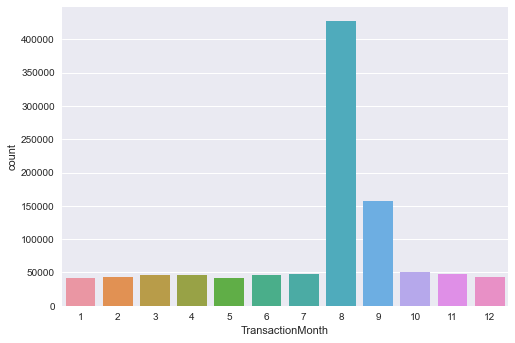

In [76]:
sns.countplot(x="TransactionMonth", data=df)

<AxesSubplot:ylabel='TransactionMonth'>

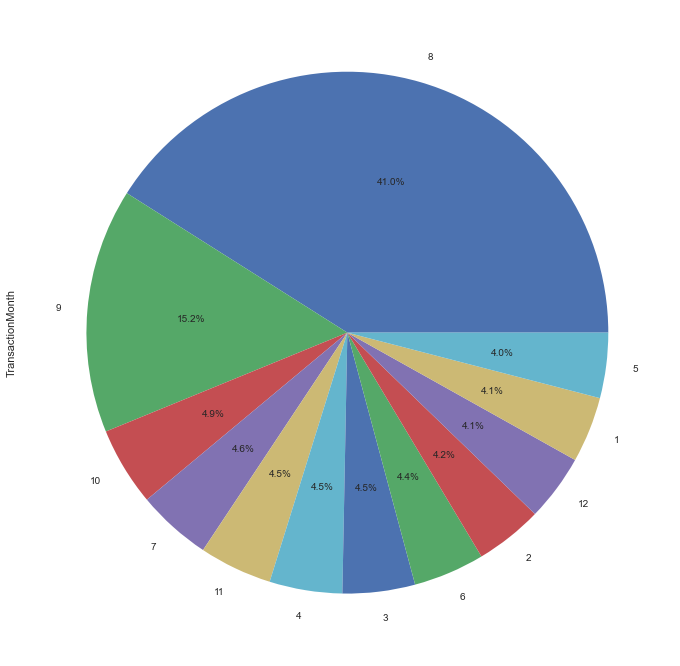

In [78]:
plt.figure(figsize = (12,12))
df['TransactionMonth'].value_counts().plot(kind='pie',autopct='%1.1f%%')

In [82]:
hh = [int(datetime.fromtimestamp(i).strftime("%H")) for i in df.TransactionTime.values]

time = []
for i in hh:
    if i >=0 and i < 13:
        time.append("Morning")
    elif i >= 13 and i<=17:
        time.append("Afternoon")
    elif i > 17 and i <= 19:
        time.append("Evening")
    elif i > 19:
        time.append("Night")
df["TransactionHourOfDay"] = hh
df["TransactionTimeOfDay"] = time

NameError: name 'datetime' is not defined

In [ ]:
plt.figure(figsize=(15,5))
random.shuffle(colors)
un, count = np.unique(df.TransactionTimeOfDay.values,return_counts=True)
count, un = zip(*sorted(zip(count, un)))
plt.title("Transaction Time of Day Distribution")
plt.xlabel("Time of Day")
plt.ylabel("Count")
plt.tick_params(bottom=False,left=False)
plt.bar(un, count, color=colors)
plt.show()

In [ ]:
df_train.isna().sum()